# Example Class 2
## Dijkstra Algorithm

#### (a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

In [88]:
import heapq
import random
import numpy as np
from numpy import Inf
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
import time

warnings.filterwarnings("ignore")
seed = 1234
random.seed(seed)
np.random.seed(seed)

---

# a) Dijkstra with Prioirty Queue

In [89]:
def dijkstra_matrix_array(adjMatrix, sourceNode):
    d = [] # array of estimates for lengths of shortest paths from source node
    pi = [] # array of predecessors for each vertex
    S =  [] # set of vertices whose shortest path from source already determined
    priorityQueue = [] # Priority Queue Q

    infinity = 9999999 # alternatively infinity = (float('inf'))
    graphLength = len(adjMatrix)

    for i in range(graphLength): # for each vertex v
        d.append(infinity) # set distance to infinity, d[v] = infinity
        # pi.append(None) # set predecessor to NULL, pi[v] = null
        pi.append(-1) # set predecessor to NULL, pi[v] = null
        S.append(0) # set solution set S to empty at first, where all v not in S

        # put all vertices in Priority Queue Q in d[v]'s increasing order
        priorityQueue.append(i)

    d[sourceNode] = 0 # set estimated distance to itself (src to src) to be 0

    while len(priorityQueue) != 0: # if Q not empty
        # Implementation of u = ExtractCheapest(Q)
        cheapest = 0
        for i in range(len(priorityQueue)):
            if (d[priorityQueue[i]] < d[priorityQueue[cheapest]]):
                cheapest = i;
        u = priorityQueue.pop(cheapest)

        S[u] = 1 # add u to S

        for i in range(graphLength): # for each vertex v adjacent to u
            vertex = i;
            weight = adjMatrix[u][i]

            if (weight > 0):
                # if vertex v not in solution set & estimated distance distance
                # of vertex v bigger than src node + weighted edge[u, v]
                if ((S[vertex] != 1) and (d[vertex] > (d[u] + weight))):
                    d[vertex] = d[u] + weight # update the new shortest value
                    pi[vertex] = u # set predecessor of vertex v as u

    return d, pi

In [131]:
def graph_generator(n, e):
    matrix = [[0 for i in range(n)] for j in range(n)]
    while (e != 0):
        a = random.randint(0, n-1)
        b = random.randint(0, n-1)
        
        if a != b and matrix[a][b] == 0:
            matrix[a][b] = 1
            e -= 1
        
    #Generating the weight
    for i in range(n):
        for j in range(n):
            if (matrix[i][j] == 1):
                matrix[i][j] = random.randint(1, 100)
                    
    return matrix

---

## Incomplete Graph

In [135]:
# not using 
# def new_IncomGraph(n, p):
#     G = nx.generators.gnp_random_graph(n, p)
#     #nx.draw(G, with_labels=True)

#     A = nx.adjacency_matrix(G).toarray()

#     edges = int(sum(sum(A)) / 2)

#     # generate weights
#     for i in range(n):
#         for j in range(n):
#             if (A[i][j] == 1):
#                 A[i][j] = random.randint(1, 100)
                
#     return A, edges, G

### Eg: Incomplete Graph

In [133]:
# incom_adjMatrixTest, noOfEdges, graph = new_IncomGraph(10, 0.6)
# nx.draw(graph, with_labels=True)
# print(incom_adjMatrixTest)
# print("\n")
# print(f'Number of edges: {noOfEdges}')

In [132]:
# Incomplete Graph
n = 10
e = n - 1 
incom_adjMatrixTest = graph_generator(n, e)
for i in incom_adjMatrixTest:
    print(i)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 78, 0, 0, 0, 35, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 67]
[0, 43, 0, 0, 0, 0, 0, 82, 0, 0]
[0, 0, 69, 0, 66, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 63, 0, 0, 0]


### Display result for Dijkstra [Incomplete  graph]

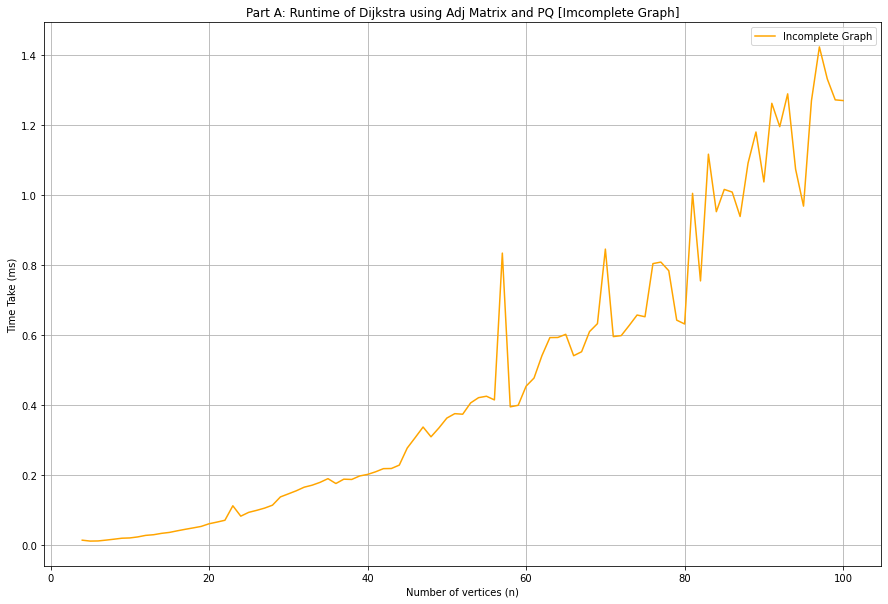

In [134]:
# E = n - 1
incomplete_a = {"x": [], "y": []}

for n in range(4, 101):
    incomplete_a["x"].append(n)
    e = n - 1
    adj_Mtr = graph_generator(n, e)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_matrix_array(adj_Mtr, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    incomplete_a["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(incomplete_a["x"], incomplete_a["y"], label = "Incomplete Graph", color = "orange")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix and PQ [Imcomplete Graph]")
plt.grid()
plt.legend()
plt.show()

---

## Complete Graph

In [93]:
# Not using
# def new_ComGraph(n, p):
#     G = nx.generators.gnp_random_graph(n, p)
#     #nx.draw(G, with_labels=True)

#     A = nx.adjacency_matrix(G).toarray()

#     edges = int(sum(sum(A)) / 2)

#     # generate weights
#     for i in range(n):
#         for j in range(n):
#             if (A[i][j] == 1):
#                 A[i][j] = random.randint(1, 100)
                
#     return A, edges, G

### Eg: Complete Graph

In [136]:
# com_adjMatrixTest, noOfEdges, graph = new_ComGraph(10, 1.0)
# nx.draw(graph, with_labels=True)
# print(com_adjMatrixTest)
# print("\n")
# print(f'Number of edges: {noOfEdges}')

In [137]:
# Complete Graph
n = 10
e = n*(n-1)  
incom_adjMatrixTest = graph_generator(n, e)
for i in incom_adjMatrixTest:
    print(i)

[0, 69, 66, 14, 26, 99, 8, 51, 93, 84]
[71, 0, 51, 27, 94, 56, 60, 39, 20, 13]
[21, 26, 0, 38, 59, 75, 12, 7, 77, 75]
[38, 49, 28, 0, 13, 87, 24, 7, 10, 64]
[42, 81, 17, 18, 0, 64, 55, 3, 59, 53]
[70, 44, 6, 24, 95, 0, 46, 61, 49, 16]
[79, 21, 9, 71, 86, 28, 0, 76, 73, 95]
[50, 21, 3, 58, 61, 96, 59, 0, 3, 10]
[6, 46, 19, 53, 45, 62, 77, 5, 0, 24]
[27, 77, 53, 33, 30, 46, 90, 47, 83, 0]


### Display result for Dijkstra [Complete  graph]

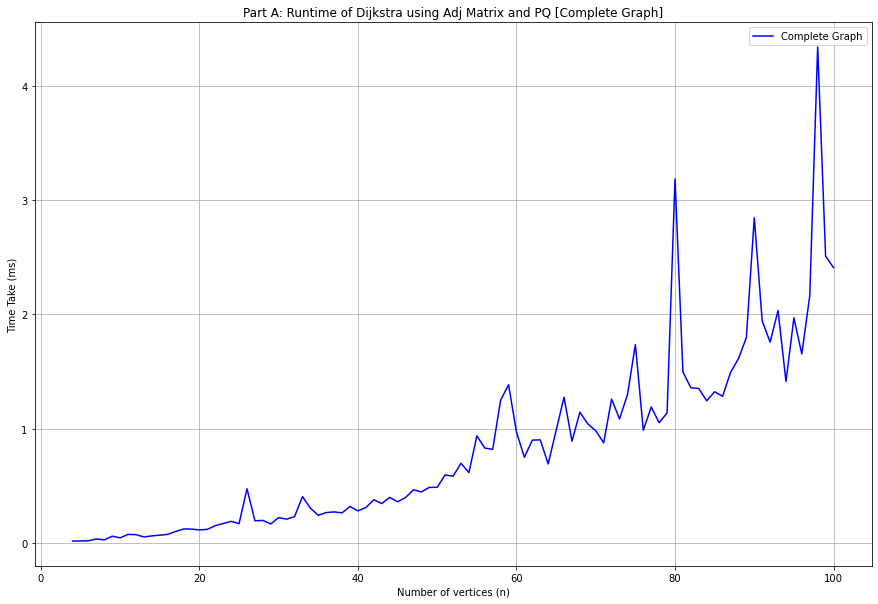

In [139]:
# Complete Graph: E = n*(n-1)
complete_a = {"x": [], "y": []}

for n in range(4, 101):
    complete_a["x"].append(n)
    e = n*(n-1)
    adj_Mtr = graph_generator(n, e)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_matrix_array(adj_Mtr, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    complete_a["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(complete_a["x"], complete_a["y"], label = "Complete Graph", color = "blue")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix and PQ [Complete Graph]")
plt.grid()
plt.legend()
plt.show()

## Complete Graph vs Incomplete Graph [Range: 4-100]
### [Priority Queue]

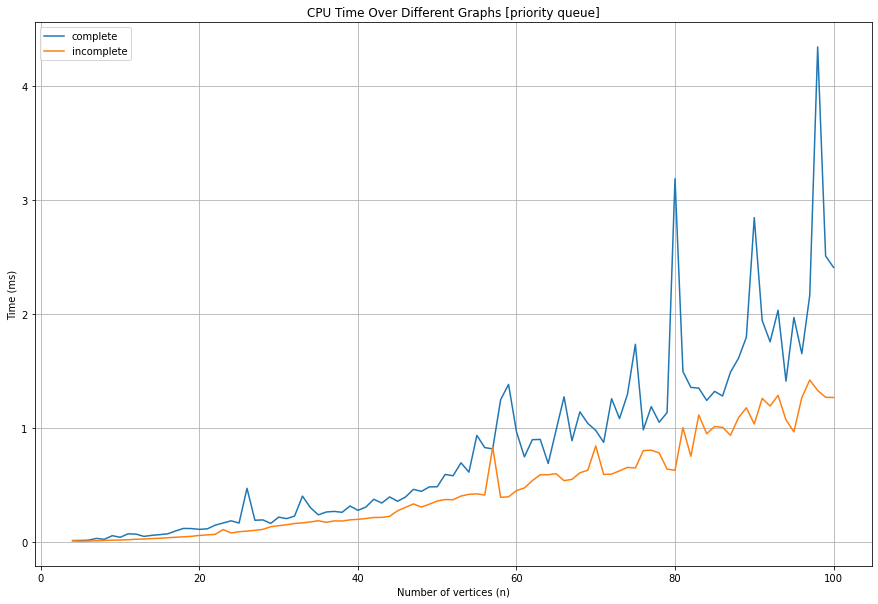

In [140]:
fig = plt.figure()
fig.set_size_inches(15, 10)
    
plt.plot(complete_a["x"], complete_a["y"], label = "complete")
plt.plot(incomplete_a["x"], incomplete_a["y"], label = "incomplete")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time (ms)")

plt.title("CPU Time Over Different Graphs [priority queue]")

plt.grid()
plt.legend()
plt.show()

## Complete Graph vs Incomplete Graph [Range: 4-1024]
### [Priority Queue]

### Incomplete

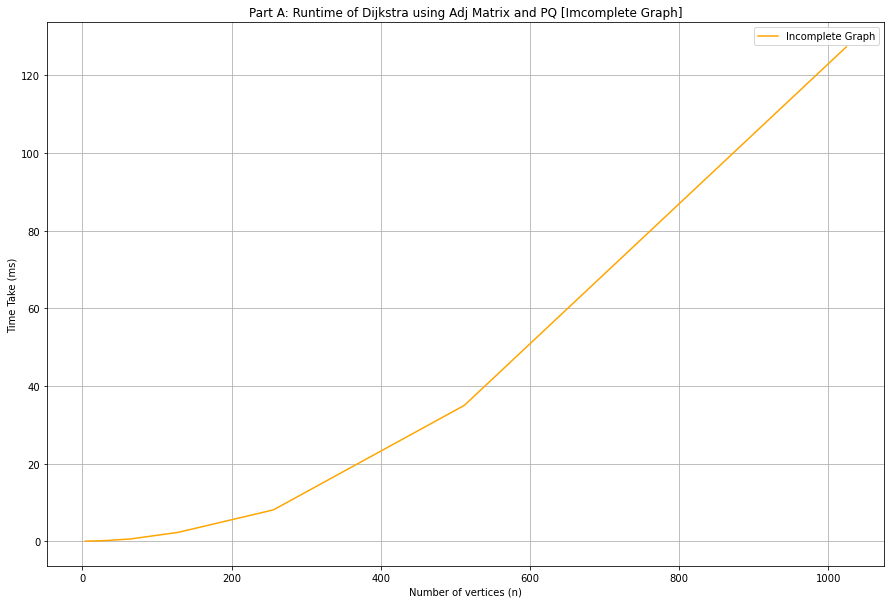

In [142]:
incomplete_a_expon = {"x": [], "y": []}

for exponent in range(2, 11 ):
    n = 2**exponent
    e = n - 1
    incomplete_a_expon["x"].append(n)
    adj_Mtr = graph_generator(n, e)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_matrix_array(adj_Mtr, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    incomplete_a_expon["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(incomplete_a_expon["x"], incomplete_a_expon["y"], label = "Incomplete Graph", color = "orange")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix and PQ [Imcomplete Graph]")
plt.grid()
plt.legend()
plt.show()

### Complete

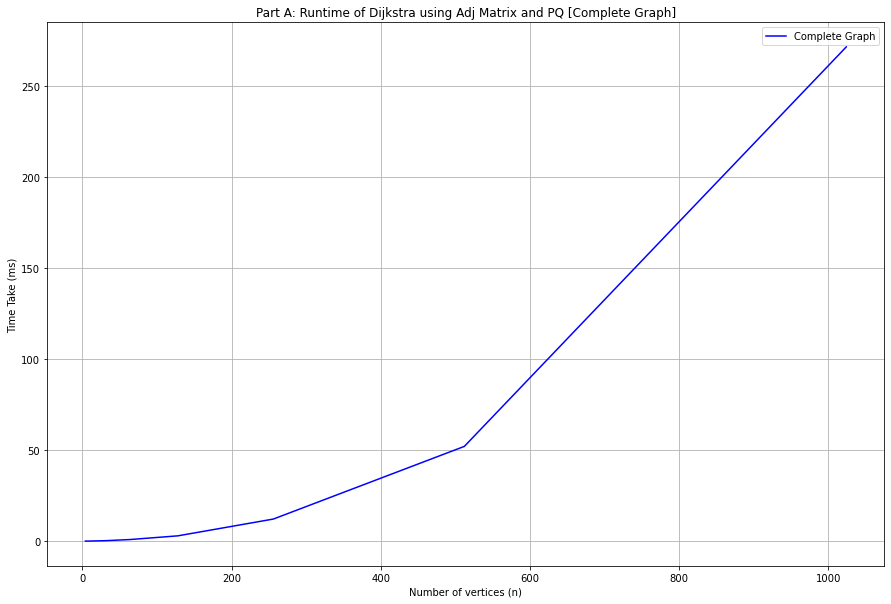

In [145]:
complete_a_expon = {"x": [], "y": []}

for exponent in range(2, 11):
    n = 2**exponent
    e = n*(n - 1)
    complete_a_expon["x"].append(n)
    adj_Mtr = graph_generator(n, e)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_matrix_array(adj_Mtr, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    complete_a_expon["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(complete_a_expon["x"], complete_a_expon["y"], label = "Complete Graph", color = "blue")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix and PQ [Complete Graph]")
plt.grid()
plt.legend()
plt.show()

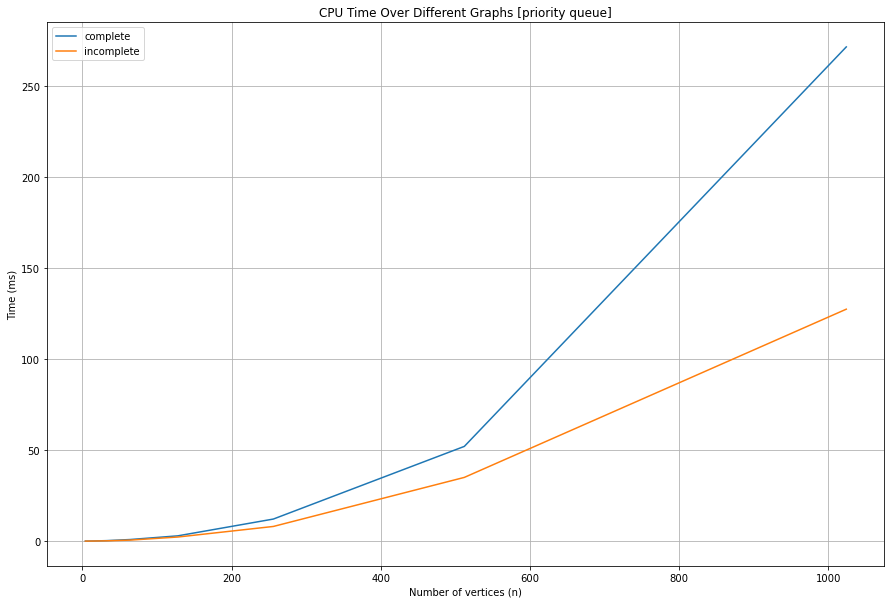

In [146]:
fig = plt.figure()
fig.set_size_inches(15, 10)
    
plt.plot(complete_a_expon["x"], complete_a_expon["y"], label = "complete")
plt.plot(incomplete_a_expon["x"], incomplete_a_expon["y"], label = "incomplete")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time (ms)")

plt.title("CPU Time Over Different Graphs [priority queue]")

plt.grid()
plt.legend()
plt.show()

# b)

### Converting adj_Matrix to adj_List

In [150]:
def convert_to_adjacency_list(graph, n):
    adjacency_list = defaultdict(list)
    for i in range(n):
        for j in range(n):
            if graph[i][j] != 0:
                adjacency_list[i].append((j, graph[i][j]))
    return adjacency_list

### Printing out adj_List

In [151]:
def print_adjList(adjList):
    for i in adjList:
        print(i, end="")
        for j in adjList[i]:
            print(" -> {}".format(j), end="")
        print()

#  Dijkstra with heap

In [152]:
def dijkstra_adj_list(graph, root):
    n = len(graph)
    # set up "inf" distances
    dist = [Inf for _ in range(n)]
    # set up root distance
    dist[root] = 0
    # set up visited node list
    visited = [False for _ in range(n)]
    # set up priority queue
    pq = [(0, root)]
    # while there are nodes to process
    while len(pq) > 0:
        # get the root, discard current distance
        _, u = heapq.heappop(pq)
        # if the node is visited, skip
        if visited[u]:
            continue
        # set the node to visited
        visited[u] = True
        # check the distance and node and distance
        for v, l in graph[u]:
            # if the current node's distance + distance to the node we're visiting
            # is less than the distance of the node we're visiting on file
            # replace that distance and push the node we're visiting into the priority queue
            if dist[u] + l < dist[v]:
                dist[v] = dist[u] + l
                heapq.heappush(pq, (dist[v], v))
    return dist

---

## Incomplete Graph

### Eg of Incomplete Graph [adj_list]

In [153]:
incom_List = convert_to_adjacency_list(incom_adjMatrixTest, 10)
print_adjList(incom_List)

0 -> (1, 69) -> (2, 66) -> (3, 14) -> (4, 26) -> (5, 99) -> (6, 8) -> (7, 51) -> (8, 93) -> (9, 84)
1 -> (0, 71) -> (2, 51) -> (3, 27) -> (4, 94) -> (5, 56) -> (6, 60) -> (7, 39) -> (8, 20) -> (9, 13)
2 -> (0, 21) -> (1, 26) -> (3, 38) -> (4, 59) -> (5, 75) -> (6, 12) -> (7, 7) -> (8, 77) -> (9, 75)
3 -> (0, 38) -> (1, 49) -> (2, 28) -> (4, 13) -> (5, 87) -> (6, 24) -> (7, 7) -> (8, 10) -> (9, 64)
4 -> (0, 42) -> (1, 81) -> (2, 17) -> (3, 18) -> (5, 64) -> (6, 55) -> (7, 3) -> (8, 59) -> (9, 53)
5 -> (0, 70) -> (1, 44) -> (2, 6) -> (3, 24) -> (4, 95) -> (6, 46) -> (7, 61) -> (8, 49) -> (9, 16)
6 -> (0, 79) -> (1, 21) -> (2, 9) -> (3, 71) -> (4, 86) -> (5, 28) -> (7, 76) -> (8, 73) -> (9, 95)
7 -> (0, 50) -> (1, 21) -> (2, 3) -> (3, 58) -> (4, 61) -> (5, 96) -> (6, 59) -> (8, 3) -> (9, 10)
8 -> (0, 6) -> (1, 46) -> (2, 19) -> (3, 53) -> (4, 45) -> (5, 62) -> (6, 77) -> (7, 5) -> (9, 24)
9 -> (0, 27) -> (1, 77) -> (2, 53) -> (3, 33) -> (4, 30) -> (5, 46) -> (6, 90) -> (7, 47) -> (8, 83)


### Result using heap [Incomplete_Graph]

In [164]:
incomplete_b = {"x": [], "y": []}

for n in range(4, 101):
    incomplete_b["x"].append(n)
    e = n - 1
    adj_Mtr = graph_generator(n, e)
    for i in adj_Mtr:
        print(i)
    incom_list = convert_to_adjacency_list(adj_Mtr, n)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_adj_list(incom_list, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    incomplete_b["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(incomplete_b["x"], incomplete_b["y"], label = "Incomplete Graph", color = "orange")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part B: Runtime of Dijkstra using Adj List and heap [Imcomplete Graph]")
plt.grid()
plt.legend()
plt.show()

[0, 0, 0, 0]
[91, 0, 0, 0]
[0, 45, 0, 0]
[17, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 56]
[69, 0, 0, 0, 87]
[55, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0]
[0, 0, 7, 10, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 85, 0, 0]
[0, 0, 4, 0, 0, 0]


IndexError: list index out of range

---

## Complete Graph

### Eg of Complete Graph [adj_list]

In [105]:
com_List = convert_to_adjacency_list(com_adjMatrixTest, 10)
print_adjList(com_List)

0 -> (1, 82) -> (2, 22) -> (3, 60) -> (4, 93) -> (5, 98) -> (6, 50) -> (7, 84) -> (8, 41) -> (9, 81)
1 -> (0, 52) -> (2, 50) -> (3, 88) -> (4, 59) -> (5, 39) -> (6, 92) -> (7, 79) -> (8, 44) -> (9, 17)
2 -> (0, 100) -> (1, 4) -> (3, 5) -> (4, 6) -> (5, 37) -> (6, 29) -> (7, 46) -> (8, 99) -> (9, 37)
3 -> (0, 29) -> (1, 22) -> (2, 22) -> (4, 78) -> (5, 50) -> (6, 73) -> (7, 92) -> (8, 1) -> (9, 51)
4 -> (0, 64) -> (1, 97) -> (2, 78) -> (3, 73) -> (5, 63) -> (6, 72) -> (7, 89) -> (8, 91) -> (9, 60)
5 -> (0, 81) -> (1, 82) -> (2, 25) -> (3, 56) -> (4, 38) -> (6, 76) -> (7, 92) -> (8, 37) -> (9, 67)
6 -> (0, 18) -> (1, 78) -> (2, 51) -> (3, 2) -> (4, 54) -> (5, 88) -> (7, 82) -> (8, 70) -> (9, 90)
7 -> (0, 98) -> (1, 59) -> (2, 19) -> (3, 9) -> (4, 21) -> (5, 91) -> (6, 20) -> (8, 1) -> (9, 37)
8 -> (0, 51) -> (1, 55) -> (2, 80) -> (3, 9) -> (4, 92) -> (5, 38) -> (6, 41) -> (7, 18) -> (9, 88)
9 -> (0, 98) -> (1, 56) -> (2, 20) -> (3, 49) -> (4, 45) -> (5, 90) -> (6, 27) -> (7, 73) -> (8, 4

### Resulting using heap [Complete_graph]

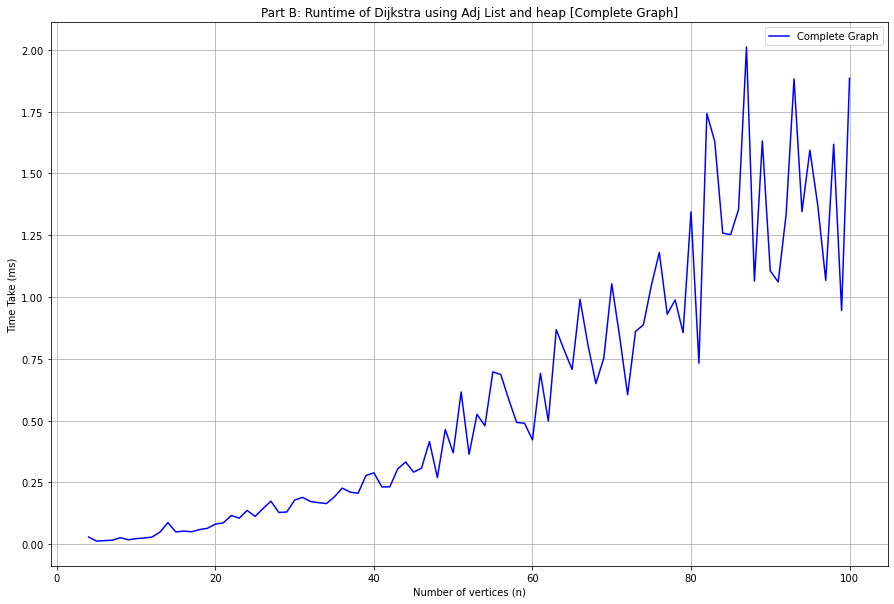

In [156]:
complete_b = {"x": [], "y": []}

for n in range(4, 101):
    complete_b["x"].append(n)
    e = n*(n - 1)
    adj_Mtr = graph_generator(n, e)
    com_list = convert_to_adjacency_list(adj_Mtr, n)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_adj_list(com_list, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    complete_b["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(complete_b["x"], complete_b["y"], label = "Complete Graph", color = "blue")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part B: Runtime of Dijkstra using Adj List and heap [Complete Graph]")
plt.grid()
plt.legend()
plt.show()

## Complete Graph vs Incomplete Graph 
### [heap]

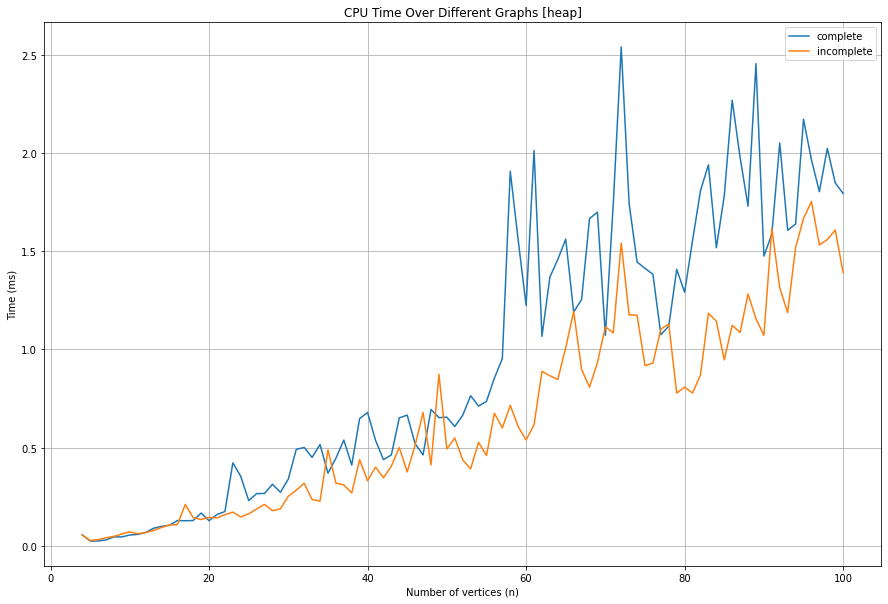

In [107]:
fig = plt.figure()
fig.set_size_inches(15, 10)
    
plt.plot(complete_b["x"], complete_b["y"], label = "complete")
plt.plot(incomplete_b["x"], incomplete_b["y"], label = "incomplete")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time (ms)")

plt.title("CPU Time Over Different Graphs [heap]")

plt.grid()
plt.legend()
plt.show()

## Complete Graph vs Incomplete Graph [Range: 4-1024]
### Heap

### Incomplete Graph

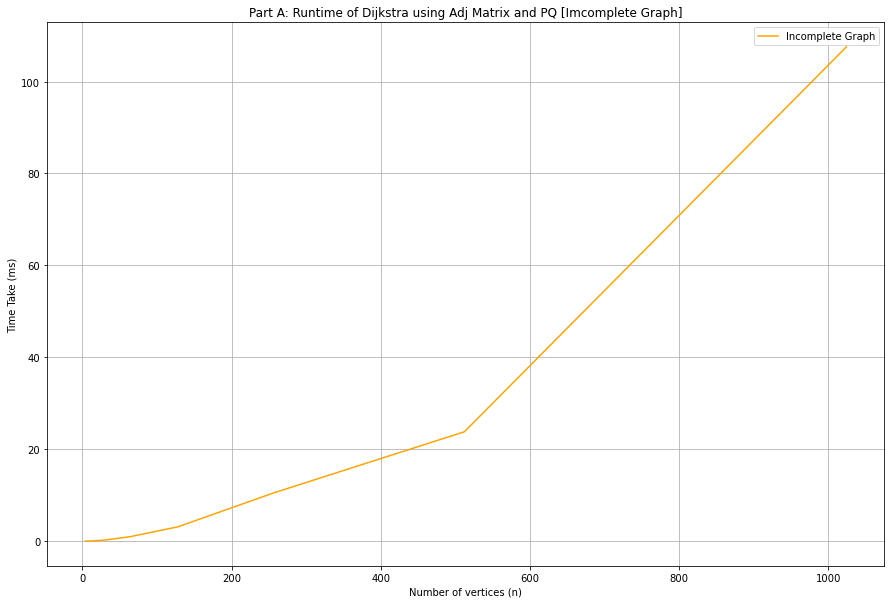

In [108]:
incomplete_b_expon = {"x": [], "y": []}

for exponent in range(2, 11 ):
    n = 2**exponent
    incomplete_b_expon["x"].append(n)
    adj_Mtr, edge, graph = new_IncomGraph(n, 0.6)
    incom_list = convert_to_adjacency_list(adj_Mtr, n)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_adj_list(incom_list, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    incomplete_b_expon["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(incomplete_b_expon["x"], incomplete_b_expon["y"], label = "Incomplete Graph", color = "orange")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix and PQ [Imcomplete Graph]")
plt.grid()
plt.legend()
plt.show()

### Complete Graph

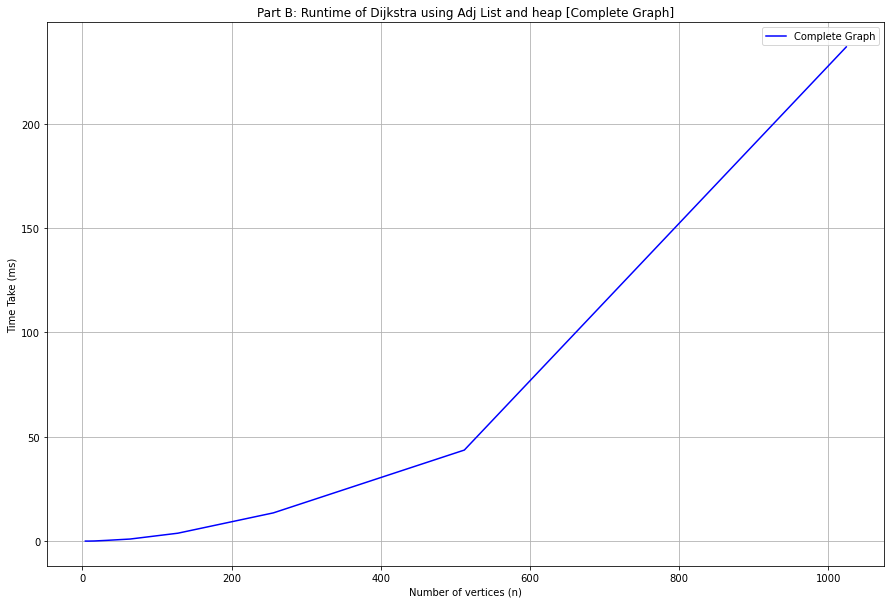

In [109]:
complete_b_expon = {"x": [], "y": []}

for exponent in range(2, 11 ):
    n = 2**exponent
    complete_b_expon["x"].append(n)
    adj_Mtr, edge, graph = new_ComGraph(n, 1.0)
    com_list = convert_to_adjacency_list(adj_Mtr, n)
    
    #print(adj_Mtr)
    
    #start measuring time
    startTime = time.perf_counter()
    
    dijkstra_adj_list(com_list, 0)
            
    #stop measuring time   
    stopTime = time.perf_counter()
    
    runtime = (stopTime - startTime) * 1000
    complete_b_expon["y"].append(runtime)


fig = plt.figure()
fig.set_size_inches(15,10)
plt.plot(complete_b_expon["x"], complete_b_expon["y"], label = "Complete Graph", color = "blue")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part B: Runtime of Dijkstra using Adj List and heap [Complete Graph]")
plt.grid()
plt.legend()
plt.show()

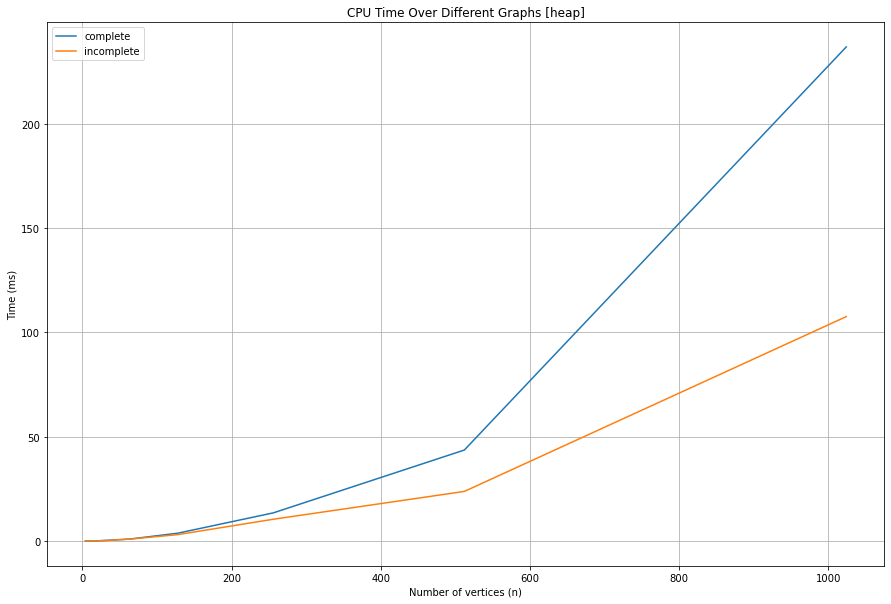

In [110]:
fig = plt.figure()
fig.set_size_inches(15, 10)
    
plt.plot(complete_b_expon["x"], complete_b_expon["y"], label = "complete")
plt.plot(incomplete_b_expon["x"], incomplete_b_expon["y"], label = "incomplete")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time (ms)")

plt.title("CPU Time Over Different Graphs [heap]")

plt.grid()
plt.legend()
plt.show()

# c)

## Complete Graph

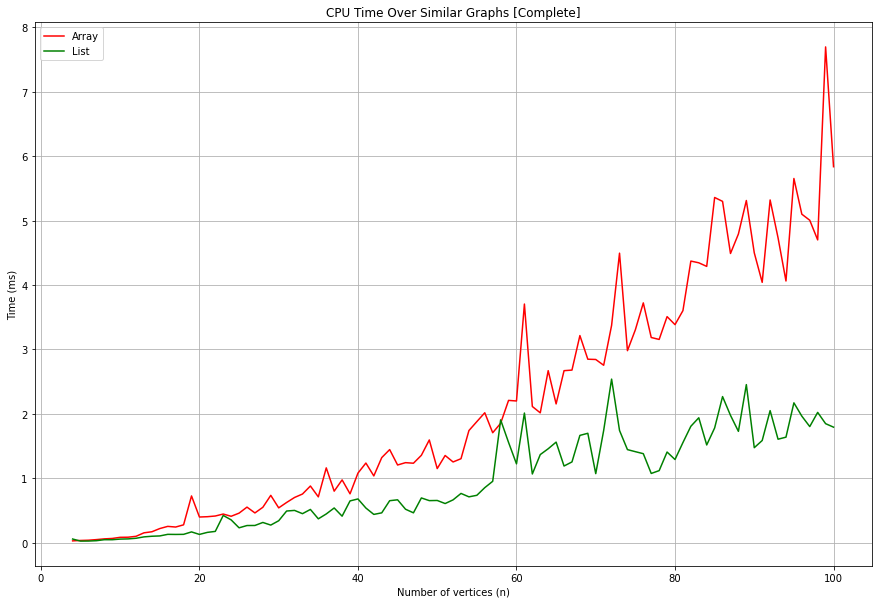

In [111]:
fig = plt.figure()
fig.set_size_inches(15, 10)

plt.plot(complete_a["x"], complete_a["y"], label = "Array", color = "red")
plt.plot(complete_b["x"], complete_b["y"], label = "List", color = "green")


plt.xlabel("Number of vertices (n)")
plt.ylabel("Time (ms)")

plt.title("CPU Time Over Similar Graphs [Complete]")

plt.grid()
plt.legend()
plt.show()

## Incomplete Graph

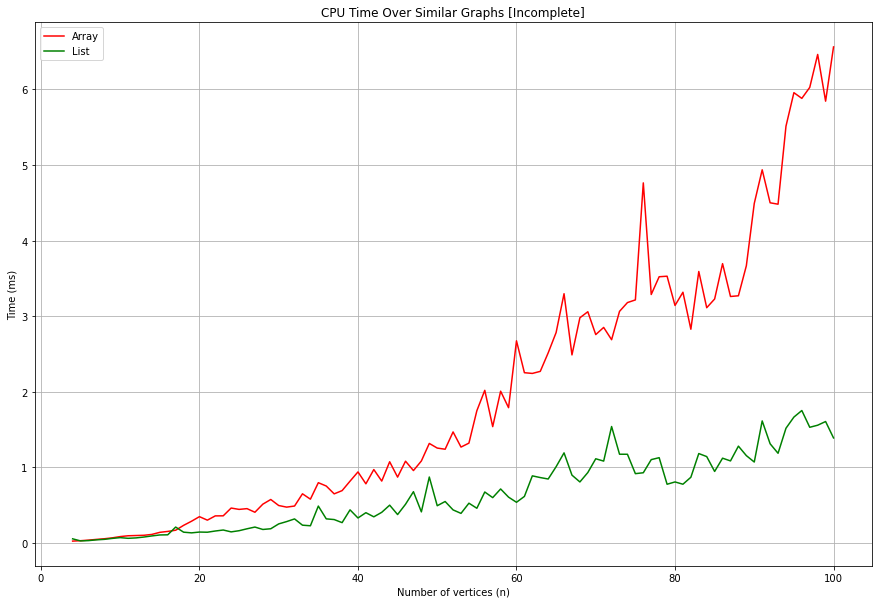

In [112]:
fig = plt.figure()
fig.set_size_inches(15, 10)

plt.plot(incomplete_a["x"], incomplete_a["y"], label = "Array", color = "red")
plt.plot(incomplete_b["x"], incomplete_b["y"], label = "List", color = "green")


plt.xlabel("Number of vertices (n)")
plt.ylabel("Time (ms)")

plt.title("CPU Time Over Similar Graphs [Incomplete]")

plt.grid()
plt.legend()
plt.show()